In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [ ]:
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --skusu # 

E-commerce Shipping Data
- 제품 배송 시간에 맞춰 배송이 되었는지 예측(binary classification task)

- 주요 feature
    - ID: ID Number of Customers.
    - Warehouse block: The Company have big - Warehouse which is divided in to block such as A,B,C,D,E.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
    - Cost of the product: Cost of the Product in US Dollars.
    - Prior purchases: The Number of Prior Purchase.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
    - Gender: Male and Female.
    - Discount offered: Discount offered on that specific product.
    - Weight in gms: It is the weight in grams.
    - **[LABEL] Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


---
- [reference : e-commerce shipping data in KAGGLE](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- 빅분기 2회 실기 기출 데이터셋 이라고 합니다.

## 데이터 불러오기

In [ ]:
# 전자상거래 운송 데이터(E-commerce Shiping Data)
X_train = pd.read_csv('./5.shipping/X_train.csv')
X_train = X_train.drop('ID', axis=1)
X_train.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,A,Flight,4,3,266,5,high,F,5,1590
1,F,Ship,3,1,174,2,low,M,44,1556
2,F,Road,4,1,154,10,high,M,10,5674


In [ ]:
X_test = pd.read_csv('./5.shipping/X_test.csv')
X_test = X_test.drop('ID', axis=1)
X_test.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Ship,5,2,259,5,low,F,7,1032
1,F,Ship,3,5,133,3,medium,F,4,5902
2,F,Road,3,4,191,5,medium,F,4,4243


In [ ]:
y_train = pd.read_csv('./5.shipping/y_train.csv')
y_train = y_train.drop('ID', axis=1)
y_train.head(3)

,Reached.on.Time_Y.N
0,0
1,1
2,1


# 문제1  EDA
- 주어진 data를 EDA하고 시각화 해주세요
- 예측에 유의미한 인사이트를 서술해주세요

## 변수 기본 정보 확인

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6598 non-null   object
 1   Mode_of_Shipment     6598 non-null   object
 2   Customer_care_calls  6598 non-null   object
 3   Customer_rating      6598 non-null   int64 
 4   Cost_of_the_Product  6598 non-null   int64 
 5   Prior_purchases      6598 non-null   int64 
 6   Product_importance   6598 non-null   object
 7   Gender               6598 non-null   object
 8   Discount_offered     6598 non-null   int64 
 9   Weight_in_gms        6598 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 515.6+ KB


**변수 기본 정보 해석**

- 총 6598개의 선박 데이터가 존재한다.
- 총 10개의 피처가 있으며 4개는 범주형(warehouse_block, Mode_of Shipment, Product_importance, Gender) 6개는 수치형(Customer_rating, Customer_care_calls, Cost_of_the_Product, Prior_purchases, Discount_offered, Wight_in_gms)이다.
- 범주형변수 : 블럭은 5종류, 운송 종류는 3종류, 상품 중요도 3종류, 성별 2종류
- 수치형변수 : 고객 배송상담 문의, 고객 상품평, 상품가격, 이전구매횟수, 할인율?, 상품무게

##  종속변수(target)

In [ ]:
y_train.head()

,Reached.on.Time_Y.N
0,0
1,1
2,1
3,1
4,1


In [ ]:
y_train.value_counts()

Reached.on.Time_Y.N
1                      3937
0                      2661
dtype: int64

### 결측치 확인 및 처리

In [ ]:
y_train.isna().sum()

Reached.on.Time_Y.N    0
dtype: int64

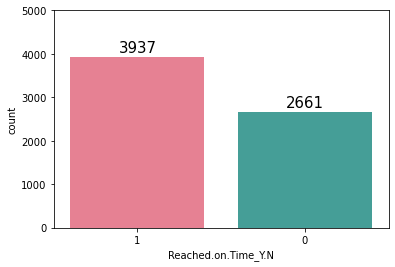

In [ ]:
# 타겟 분포

'''
fit_reg=True/False : 회귀선 표시 여부 

변수 = sns.regplot(x='컬럼명1', y='컬럼명2', data=데이타프레임명, fit_reg=True/False)
변수.set_title('제목') 
변수.set_xlabel('X축 제목')
변수.set_ylabel('Y축 제목')
'''
# y_train['Reached.on.Time_Y.N'].map({'1':'bad'})

ax = sns.countplot(x='Reached.on.Time_Y.N',
              data = y_train, 
              order = y_train['Reached.on.Time_Y.N'].value_counts().index, # 빈도 높은거 부터 
              palette="husl")

for p in ax.patches:
    height = p.get_height() # 높이 출력
    ax.text(p.get_x() + p.get_width() / 2, height+100, height, ha = 'center', size = 15)
ax.set_ylim(-5, 5000)
plt.show()

**종속 변수(해석)**

- 결측치는 없다.
- 종속변수는 0,1 두가지 경우이므로 이진분류 문제다.
- 정시도착을 못하는 케이스는 3937건(1), 정시도착하는 케이스는 2661건(0)인 클래스 불균형이다.

## 독립변수

### 결측치 확인 및 처리

In [ ]:
# 컬럼 정보
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6598 non-null   object
 1   Mode_of_Shipment     6598 non-null   object
 2   Customer_care_calls  6598 non-null   object
 3   Customer_rating      6598 non-null   int64 
 4   Cost_of_the_Product  6598 non-null   int64 
 5   Prior_purchases      6598 non-null   int64 
 6   Product_importance   6598 non-null   object
 7   Gender               6598 non-null   object
 8   Discount_offered     6598 non-null   int64 
 9   Weight_in_gms        6598 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 515.6+ KB


### 독립변수-범주형 변수

In [ ]:
# 피처 - 범주형 변수 : 수준 보기
for col in X_train.columns:
    print(X_train[col].unique())

['A' 'F' 'C' 'B' 'D']
['Flight' 'Ship' 'Road']
['4' '3' '5' '6' '2' '$7']
[3 1 2 5 4]
[266 174 154 158 175 139 220 160 145 155 226 256 204 207 274 251 267 166
 201 303 176 270 258 133 190 277 143 273 285 209 189 167 261 216 254 246
 295 229 219 245 247 215 223 164 249 217 173 149 232 181 235 150 198 144
 234 141 222 135 179 263 188 260 243 156 187 287 244 100 196 265 259 255
 151 199 257 233 224 182 252 205 248 241 162 221 184  98 211 269 183 147
 206 116 282 140 153 208 230 227 170 168 293 191 239 228 146  99 157 253
 238 280 218 152 137 214 161 305 250 115 210 242 291 225 193 202 200 275
 105 236 142 231 262 264 276 203 185 172 237 192 163 171 180 159 186 178
 240 268 213 310 290 302 134 132 195 272 169 138 102 194 296 112 197 117
 294 165 129 103 292 281 278 148 128 301 212 271 306 123 118 108 136 279
 121 177  96 110 286 283 308 299 101 126 289 284  97 114 106 122 297 111
 113 298 104 307 288 130 125 124 127 304 300 119 109 309 131 120 107]
[ 5  2 10  3  4  6  7  8]
['high' 'low' '

In [ ]:
# 피처 - 범주형 변수 : 수준 보기
for col in X_test.columns:
    print(X_test[col].unique())

['D' 'F' 'C' 'A' 'B']
['Ship' 'Road' 'Flight']
['5' '3' '4' '6' '$7' '2']
[2 5 4 1 3]
[259 133 191 221 230 254 250 273 253 249 255 218 144 177 260 252 199 198
 192 257 244 286 206 236 140 183 215 145 195 167 193 205 127 231 222 291
 170 233 266 182 208 155 241 139 156 209 184 143 239 217 174 276 242 169
 309 248 165 240 110 211 154 262 226 176 268 102 269 166 202 264 178 200
 187 261 223 274 214 232 141 235 190 229 149 164 168 263 185 270 243 153
 219 283 305 201 152 245 304 251 162 292 147 159 246 146 234 109 189 228
 271 247 197 256 204 117 134 100 216 279 142 180 112 287 105 136 265 194
 282 113 272 161 213 275 220 238 179 104 258 129 157 151 212 237 150 285
 138 148 307 296 196 111 181 306 172 225 278 188 171 163 132 160 267 224
 135 116 175 300 227 294 301 158 173 118 284 298 280 101 137 186 210 103
 207 310 295 125 289 107 308 124 123 203  96 120 303 121 277 299 290 281
 106 114 293  98 115  97 130 131 119 288 128  99 126 302 297 108]
[ 5  3  2  6  4  8  7 10]
['low' 'medium' 'hi

In [ ]:
# 수준 이상한 것 처리
X_train['Customer_care_calls'] = X_train['Customer_care_calls'].replace('$7',7)
X_train['Customer_care_calls'] = X_train['Customer_care_calls'].apply(pd.to_numeric) # X_train[['Customer_care_calls']]

In [ ]:
# 수준 이상한 것 처리
X_test['Customer_care_calls'] = X_test['Customer_care_calls'].replace('$7',7)
X_test['Customer_care_calls'] = X_test['Customer_care_calls'].apply(pd.to_numeric) # X_test[['Customer_care_calls']]

In [ ]:
# 피처 - 범주형 변수 기술통계량
X_train.describe(include='O').T

,count,unique,top,freq
Warehouse_block,6598,5,F,2262
Mode_of_Shipment,6598,3,Ship,4512
Product_importance,6598,3,low,3162
Gender,6598,2,F,3311


#### 범주형 (이상치 확인 및 처리 포함) : 빈도(count), 분포(hist)

In [ ]:
cat = [col for col in X_train.columns if X_train[col].dtype=='object']    

In [ ]:
X_train.loc[:,cat]

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,A,Flight,high,F
1,F,Ship,low,M
2,F,Road,high,M
3,F,Ship,medium,F
4,A,Flight,low,M
...,...,...,...,...
6593,F,Road,medium,M
6594,F,Ship,medium,M
6595,F,Ship,medium,F
6596,F,Road,medium,F


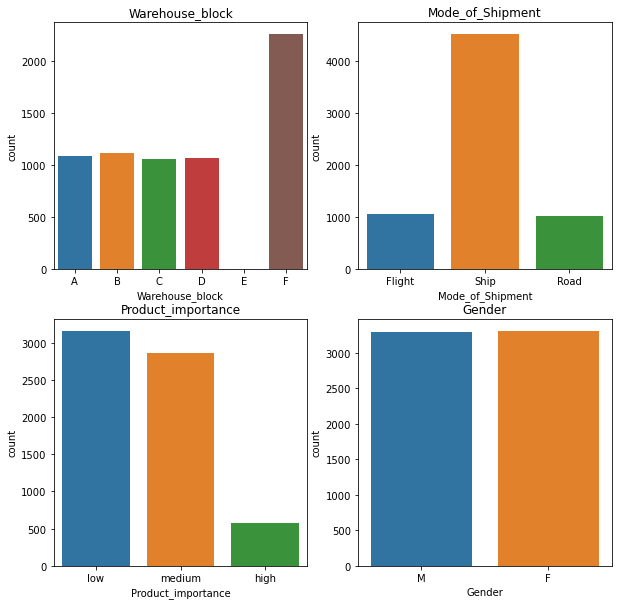

In [ ]:
# 방법1 . 직접입력 (R에서 fct_relevel()과 같이 order를 활용하여 범주형 수준 정리 가능)

fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(10,10))

sns.countplot(x = 'Warehouse_block', data = X_train.loc[:,cat], ax = axes[0,0], order = ['A','B','C','D','E','F'])
axes[0,0].set_title('Warehouse_block')

sns.countplot(x = 'Mode_of_Shipment', data = X_train.loc[:,cat], ax = axes[0,1])
axes[0,1].set_title('Mode_of_Shipment')

sns.countplot(x = 'Product_importance', data = X_train.loc[:,cat], ax = axes[1,0], order = ['low','medium','high'])
axes[1,0].set_title('Product_importance')

sns.countplot(x = 'Gender', data = X_train.loc[:,cat], ax = axes[1,1], order = ['M','F'])
axes[1,1].set_title('Gender')
plt.show()

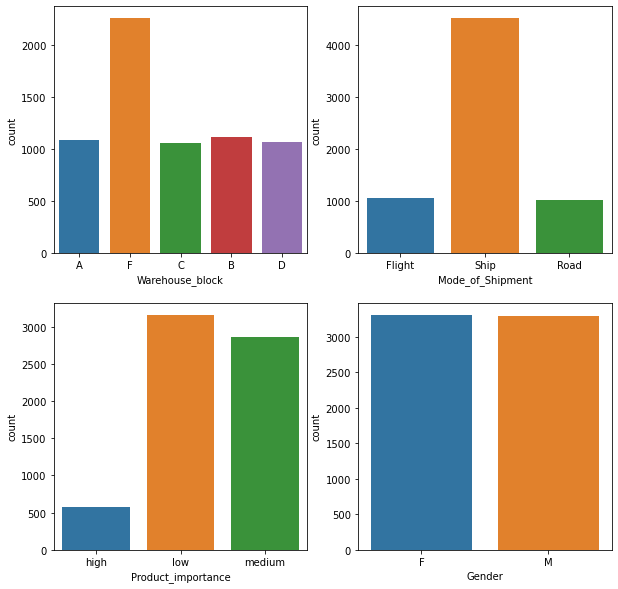

In [ ]:
# 방법2 . for문(add_subplot 활용)
fig = plt.figure(figsize=(10,10)) # 형태 지정

n=1
for col in cat:
    axes = fig.add_subplot(2,2,n)
    sns.countplot(x = col, data = X_train.loc[:,cat], ax = axes)
    n +=1
plt.show()

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

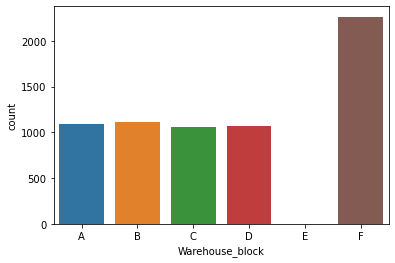

In [ ]:
sns.countplot(X_train.loc[:,cat]['Warehouse_block'],order = ['A','B','C','D','E','F'])

### 독립변수-수치형 변수

In [ ]:
num = list(set(X_train.columns) - set(cat))

In [ ]:
# 피처 - 수치형 변수 기술통계량
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,6598.0,4.051985,1.149251,2.0,3.00,4.0,5.0,7.0
Customer_rating,6598.0,2.991361,1.409624,1.0,2.00,3.0,4.0,5.0
Cost_of_the_Product,6598.0,210.393149,48.258089,96.0,170.00,214.0,251.0,310.0
Prior_purchases,6598.0,3.577751,1.511394,2.0,3.00,3.0,4.0,10.0
Discount_offered,6598.0,13.353592,16.187267,1.0,4.00,7.0,10.0,65.0
Weight_in_gms,6598.0,3604.191119,1635.697627,1001.0,1834.25,4119.5,5027.5,7684.0


**범주형변수 EDA 결과**

- 모든 독립변수의 결측치는 없다
- 'Customer_care_calls'에 $7이 있어서 숫자 7로 치환함
- Warehouse_block 빈도분석 결과,F창고를 통해 운송을 가장 많이 한다.
- Mode_of_Shipment 빈도분석 결과, 배를 통해 운송을 가장 많이 한다.
- Proudcut_importance 빈도를 보면 고품질 물건이 가장 적고 저품질>중간품질의 물건 운송이 가장 많다.
- 운송 대상의 성별은 남자, 여자가 비슷한 수준이다.

#### 수치형 (이상치 확인 및 처리 포함) : 분포, 박스플롯 

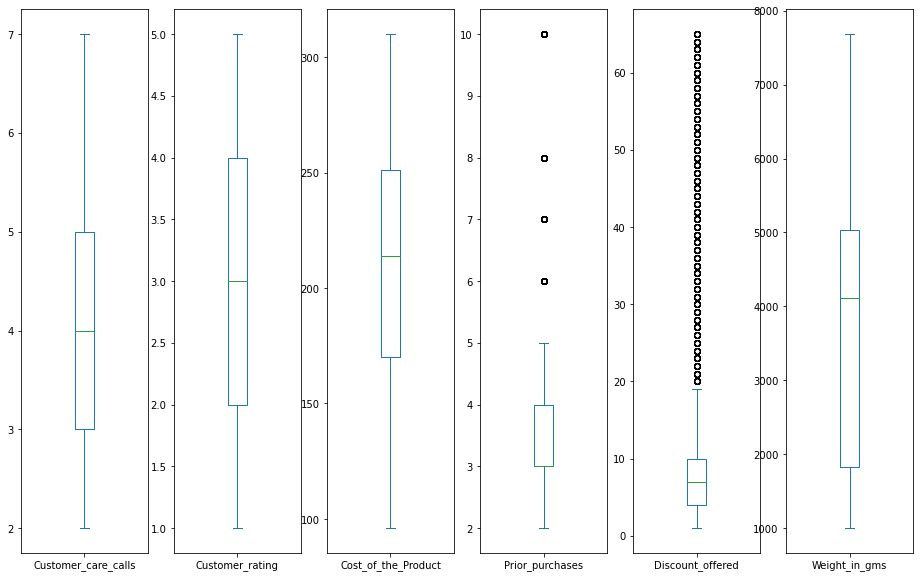

In [ ]:
# 박스플롯(X)
X_train.plot(subplots=True, layout = (1,6), kind='box',figsize=(16,10)) # 자동으로 수치형만..
plt.show()

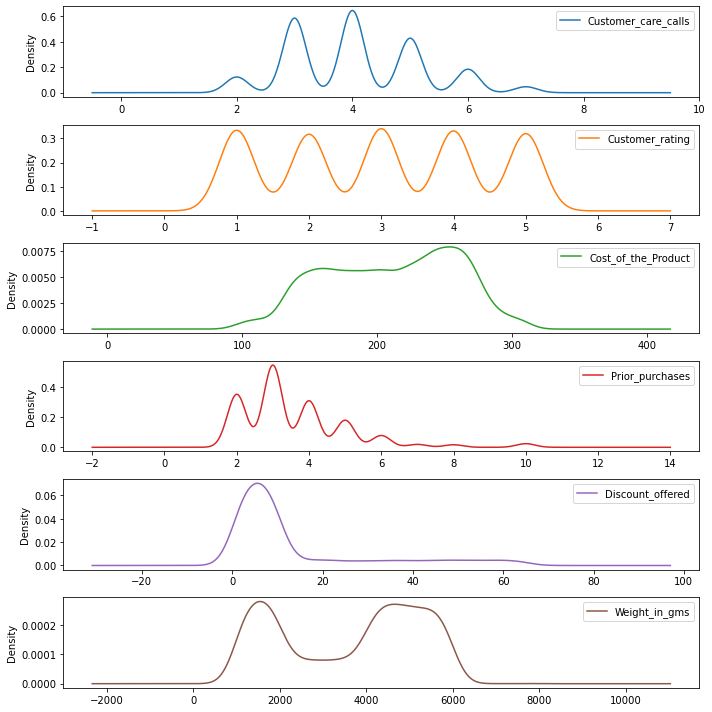

In [ ]:
# 분포(X)
X_train.plot(subplots=True, layout = (6,1), kind='kde',figsize=(10,10),sharex=False, sharey=False) # 자동으로 수치형만..
plt.tight_layout()
plt.show()

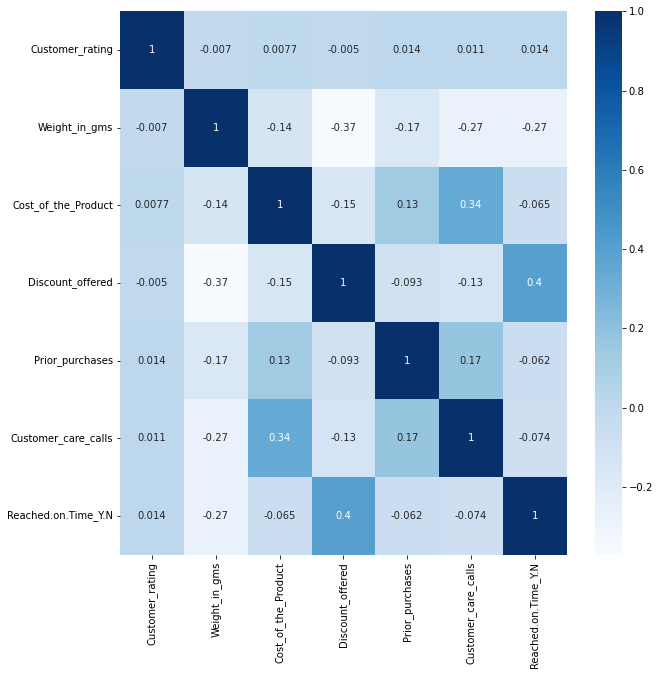

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.concat([X_train.loc[:,num], y_train], axis=1).corr(), annot=True, cmap='Blues')
plt.show()

<Figure size 720x720 with 0 Axes>

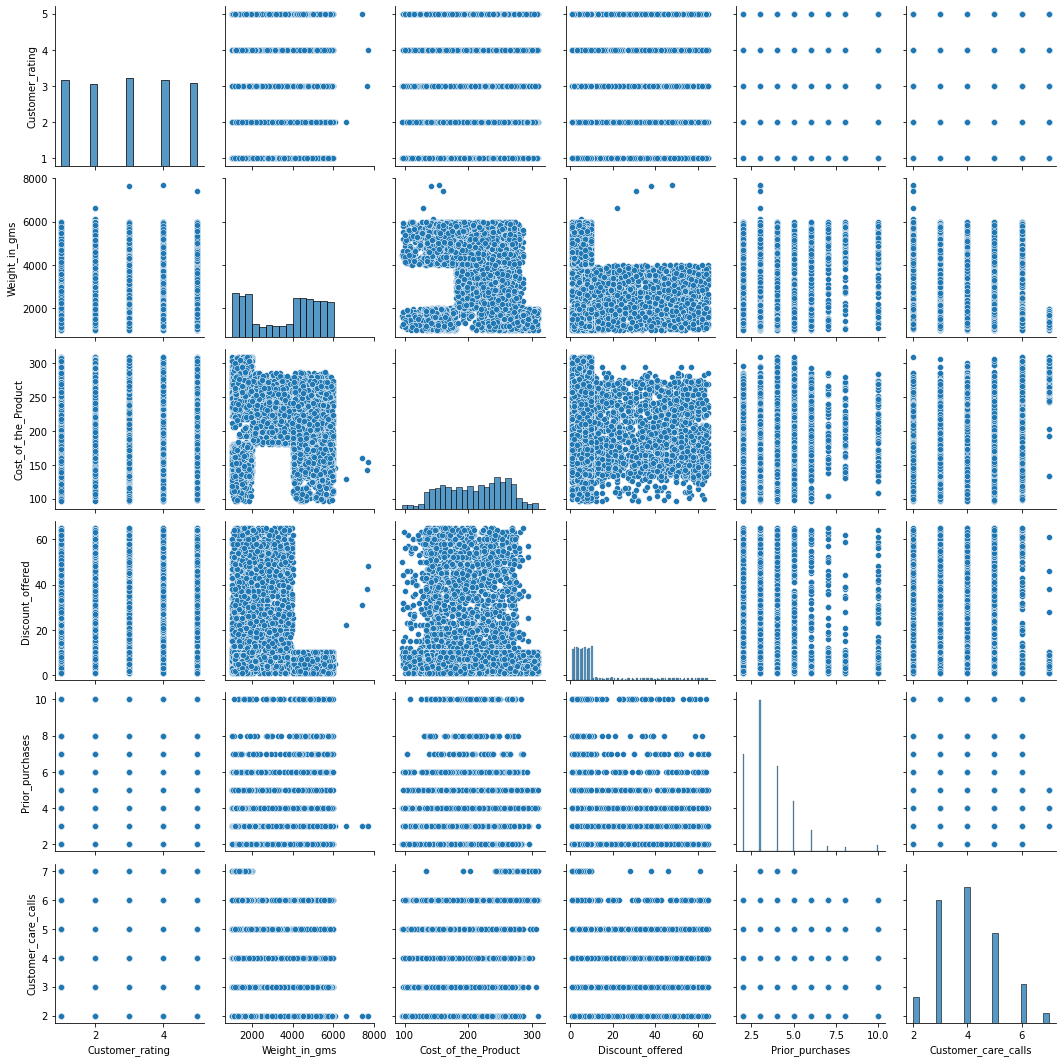

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(X_train.loc[:,num])
plt.show()

**수치형 변수 EDA 결과**
- 'Customer_care_calls' 3~5회 정도 문의를 했다.
- Customer_rating' 1~5점까지 고루 분포되어있다.
- 'Prior_purchases'는 1-5 회에 분포되어있으며 2~4회가 가장 많다
- 'Discount_offered'는 주로 20% 이내로 많이 한다.
- 'Weight_in_gms' 무게는 소형, 대형으로 구분할 수 있으며 주로 0~3kg, 4kg이상 정도로 나눌 수 있다.
- 히트맵을 보면 수치형 독립변수간 다중공선성이 존재하지 않으며, 타겟과 뚜렷한 상관관계가 없다.(단, Disocount_offer과 타겟과 0.4정도의 약한 양의 상관관계가 보인다)

### 독립변수-범주형 + 수치형

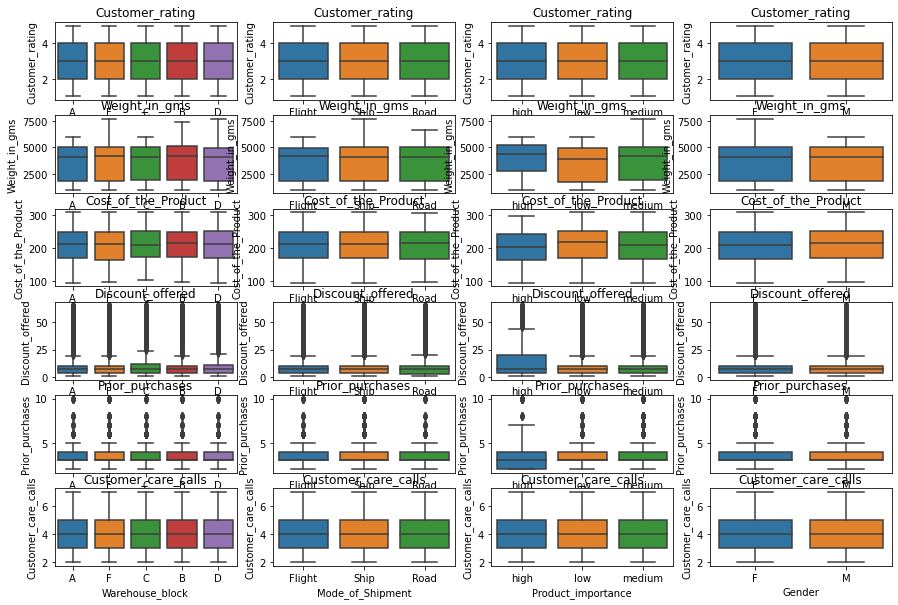

In [ ]:
# 박스플롯(X)
n=1

plt.figure(figsize=(15, 10))
for num_col in num:
    for cat_col in cat:
        plt.subplot(6,4,n) # subplot은 하나의 값(axes)만 받을 수 있다.
        # subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다.
        
        sns.boxplot(x = cat_col, y = num_col, data = X_train) # 자동으로 수치형만..
        plt.title(num_col)
        n +=1
        
plt.show()

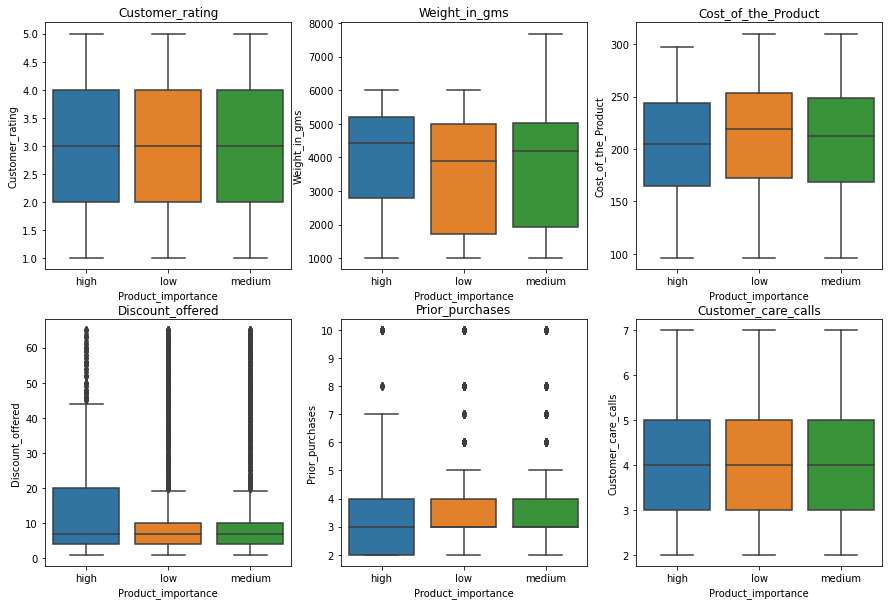

In [ ]:
# 박스플롯(X)
n=1

plt.figure(figsize=(15, 10))
for num_col in num:
    plt.subplot(2,3,n) # subplot은 하나의 값(axes)만 받을 수 있다.
        # subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다.
    sns.boxplot(x = 'Product_importance', y = num_col, data = X_train) # 자동으로 수치형만..
    plt.title(num_col)
    n +=1
plt.show()

**범주형 + 수치형 변수 EDA 결과**
- 수치형변수(6개)가 범주(4개)의 조합 24개에 대한 박스플롯을 보니 범주에 따라 수치들이 대체로 비슷한 수준임.
- 다만, 상품중요도가 높을수록 Discount_offered, 무게가 높았고 사전구매율은 낮았다.

# 문제2 전처리
- 필요한 전처리를 한 후, 처리한 이유를 서술해주세요

25.75
75.25


<AxesSubplot:>

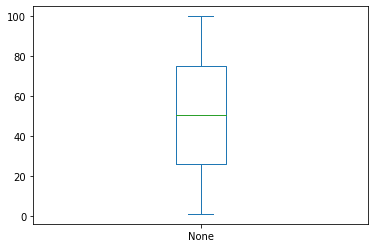

In [ ]:
# Q1 : 0.25
# Q2 : median(X)
# Q3 : 0.75

x = np.arange(1,101)
print(pd.Series(x).quantile(0.25)) # Q1
print(pd.Series(x).quantile(0.75)) # Q3

pd.Series(x).plot(kind='box')

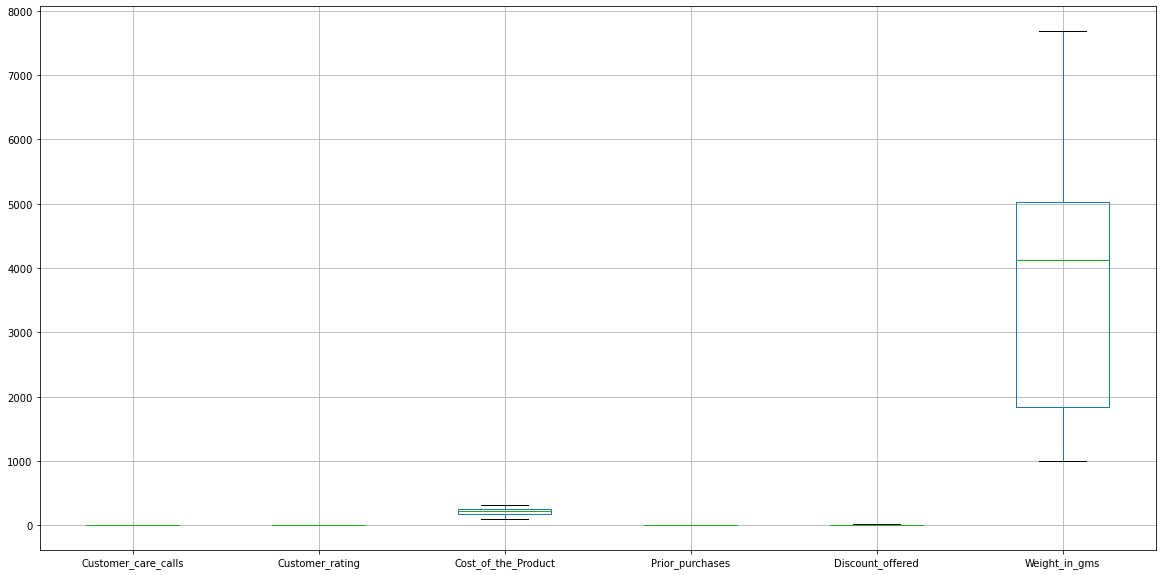

In [ ]:
X_train_copy = X_train.copy()

cat = [col for col in X_train_copy.columns if X_train_copy[col].dtype=='object']
num = list(set(X_train_copy.columns) - set(cat))

plt.figure(figsize=(20,10))

for col in num:
    IQR = X_train_copy[col].quantile(0.75) - X_train_copy[col].quantile(0.25) #IQR = Q3 - Q1
    upper = X_train_copy[col].quantile(0.75) + IQR *1.5
    lower = X_train_copy[col].quantile(0.25) - IQR * 1.5
    X_train_copy[col] = X_train_copy[col].clip(upper, lower)

X_train_copy.boxplot()
plt.show()

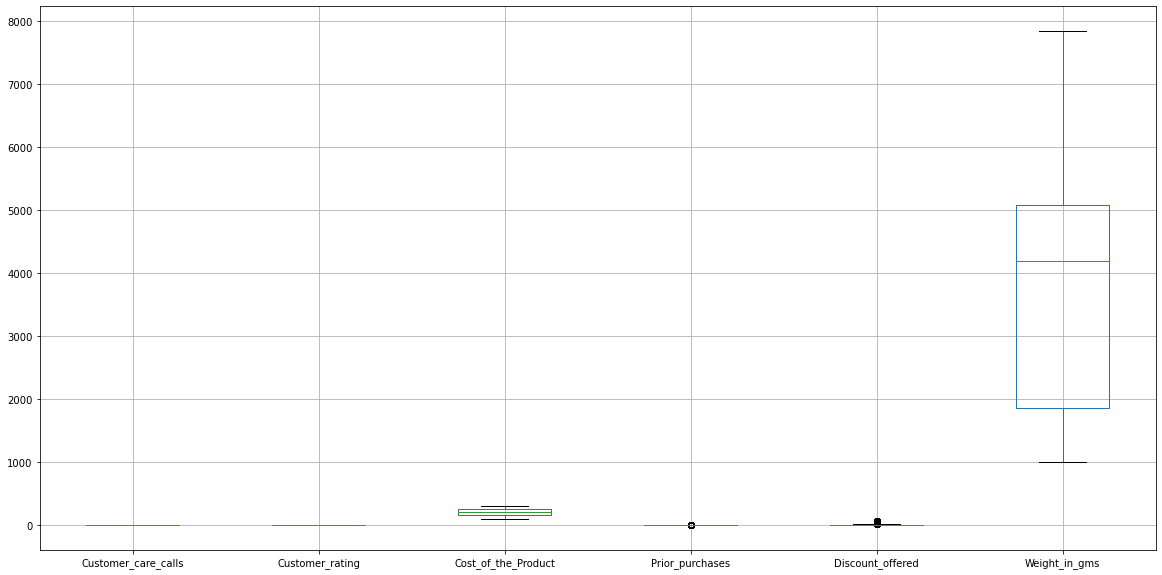

In [ ]:
plt.figure(figsize=(20,10))
X_test.boxplot()
plt.show()

In [ ]:
# X_train
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링
cat = [col for col in X_train_copy.columns if X_train_copy[col].dtype=='object']
num = list(set(X_train_copy.columns) - set(cat))

cat_X_train = pd.get_dummies(X_train_copy.loc[:,cat], drop_first=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_X_train = pd.DataFrame(sc.fit_transform(X_train_copy.loc[:,num]), columns=X_train_copy.loc[:,num].columns)


# X_test
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링

cat = [col for col in X_test.columns if X_test[col].dtype=='object']
num = list(set(X_test.columns) - set(cat))

cat_X_test = pd.get_dummies(X_test.loc[:,cat], drop_first=True)
num_X_test = pd.DataFrame(sc.transform(X_test.loc[:,num]), columns=X_test.loc[:,num].columns)



# X_train, X_test after scailing
X_train_sc = pd.concat([cat_X_train, num_X_train],axis=1)
X_test_sc = pd.concat([cat_X_test, num_X_test],axis=1)

**전처리 내용**
- 범주형 데이터 처리

> 데이터 타입이 object인 범주형 데이터 이기 때문에 회귀분석을 위해 더미 변수 처리를 해준다.

- 수치형 데이터 처리

> 박스플롯을 보면 이상치가 많이 보이므로 제거하였으며 변수별 측정단위가 다르므로 스케일링을 진행한다.

# 문제3 통계분석
- 아래 feature간 통계분석을 자유롭게 수행하고 결과를 서술해주세요
    - Customer rating ~ Reached on time
    - Product importance ~ Customer rating

### Customer rating ~ Reached on time : t-test


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Customer_rating'>

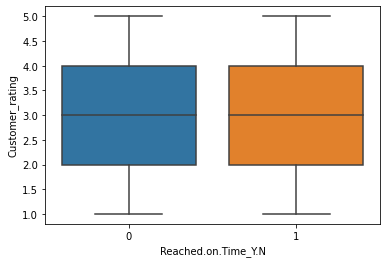

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# t-test
df = pd.concat([X_train.Customer_rating, y_train['Reached.on.Time_Y.N']], axis=1)
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(object)
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df.Customer_rating)

In [ ]:
df.groupby(by = 'Reached.on.Time_Y.N').mean()

,Customer_rating
Reached.on.Time_Y.N,
0,2.967681
1,3.007366


In [ ]:
import pingouin as pg
x = df.loc[df['Reached.on.Time_Y.N']==0, 'Customer_rating']
y = df.loc[df['Reached.on.Time_Y.N']==1,'Customer_rating']
pg.ttest(x,y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.120803,5690.389422,two-sided,0.262419,"[-0.11, 0.03]",0.028153,0.053,0.201961


In [ ]:
pd.crosstab(X_train.Customer_rating, y_train['Reached.on.Time_Y.N'])

Reached.on.Time_Y.N,0,1
Customer_rating,,
1,569,772
2,499,776
3,538,829
4,559,771
5,496,789


In [ ]:
import pingouin as pg
pg.ttest(x = X_train.Customer_rating, y= y_train['Reached.on.Time_Y.N'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,130.322661,13194,two-sided,0.0,"[2.36, 2.43]",2.26897,inf,1.0


In [ ]:
print(x.mean(),x.std(ddof=1))
print(y.mean(),y.std(ddof=1))

2.9676813228109733 1.413578165768529
3.0073660147320296 1.406899591210816


In [ ]:
from scipy.stats import norm,t

print(norm.cdf(x = 1.96)) # 정규분포에서 x까지의 누적 확률 
print(norm.ppf(q = 0.95)) # 정규분포에서 누적확률이 q가 되게 하는 Z

alpha = 0.05
Z = norm.ppf(1-alpha/2)
Z

0.9750021048517795
1.6448536269514722


1.959963984540054

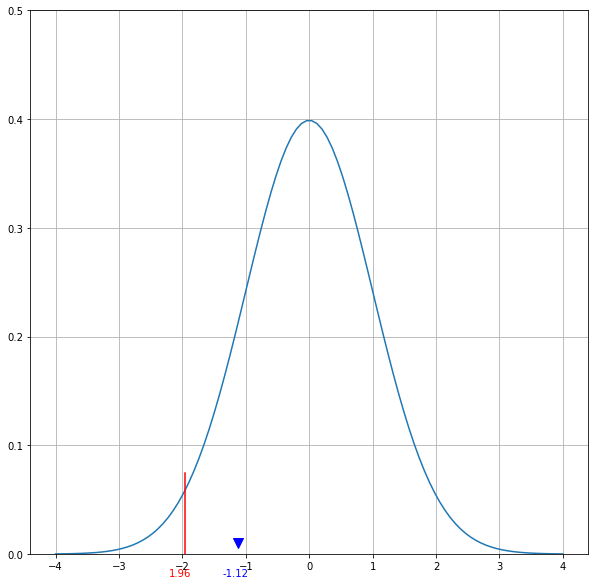

In [ ]:
# known sigma, alpha=0.05, 양측검정 
z = (x.mean() - y.mean()) / np.sqrt( (x.std()**2 /len(x)) + (y.std()**2 /len(y)) )


from scipy.stats import norm,t
import scipy.stats as stats

plt.figure(figsize=(10,10))
X = np.linspace(-4, 4, 100)
rv = stats.norm(loc =0, scale = 1)
pdf = rv.pdf(X)
plt.plot(X, pdf)
plt.ylim(0,0.5)
plt.axvline(x = -Z, color='r', ymax=0.15)
plt.text(-Z-0.25, -0.02, np.round(Z,2), color='r')


plt.scatter(z, 0.01, color='b',marker='v',s=100)
plt.text(z-0.25, -0.02, np.round(z,2), color='b')
plt.grid()
plt.show()

In [ ]:
# 등분산 검정 (두 모분산을 모를 때)
n1 = len(x)
n2 = len(y)
s1 = x.std(ddof=1)
s2 = y.std(ddof=1)

alpha =0.05

z = s1**2/s2**2

down = z/stats.f.ppf(1-alpha/2, dfd = n1-1, dfn = n2-1)
up = z/stats.f.ppf(alpha/2, dfd = n1-1, dfn = n2-1)
print(down,up)
print(z)

0.9414342791219233 1.0820085802131563
1.0095165657150442


Text(0.5, 1.0, 'p.d.f')

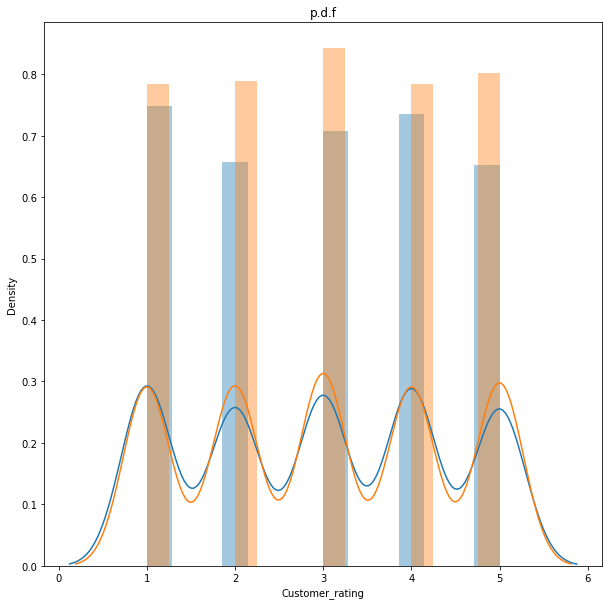

In [ ]:
plt.figure(figsize=(10,10))
# xx = np.linespace(-4,4,100)
sns.distplot(x, label = 'Reached.on.Time Yes')
sns.distplot(y, label = 'Reached.on.Time No')
plt.title('p.d.f')

### Product importance ~ Customer rating : 독립성 검정

In [ ]:
# 전자상거래 운송 데이터(E-commerce Shiping Data)
X_train = pd.read_csv('./5.shipping/X_train.csv')
X_train = X_train.drop('ID', axis=1)
X_train.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,A,Flight,4,3,266,5,high,F,5,1590
1,F,Ship,3,1,174,2,low,M,44,1556
2,F,Road,4,1,154,10,high,M,10,5674


In [ ]:
X_train['Product_importance'][:3]

0    high
1     low
2    high
Name: Product_importance, dtype: object

In [ ]:
table = pd.crosstab(X_train.Product_importance, y_train['Reached.on.Time_Y.N'])
print(table.shape)
table

(3, 2)


Reached.on.Time_Y.N,0,1
Product_importance,,
high,194,376
low,1293,1869
medium,1174,1692


In [ ]:
import scipy.stats as stats
print('검정통계량 : ',stats.chi2_contingency(table)[0])
print('p-value : ',stats.chi2_contingency(table)[1])

검정통계량 :  10.277724986192332
p-value :  0.005864356666959069


# 문제4 모델링 및 예측
- 모델링
    - 3가지 모델을 선택해 모델링해주세요.
    - 모델을 선택한 이유를 서술해주세요
- 예측
    - 성능지표를 3가지 선택해 측정해주세요
    - 지표를 선택한 이유를 서술해주세요

In [ ]:
# test 데이터 불러오기 
y_test = pd.read_csv('./5.shipping/y_test.csv')
y_test = y_test.drop('ID', axis=1)

In [ ]:
# 성능평가 함수 정의
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix,f1_score

def get_eval(model, X_train, y_train, X_test, y_test, pred = None, pred_proba = None):
    # 모델링
    fit = model.fit(X_train, y_train)
    pred = fit.predict(X_test)
    pred_proba = fit.predict_proba(X_test)
    # define metric 
    conf = confusion_matrix(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba[:,1])
    # ROC 커브
    fpr, tpr, threshold = roc_curve(y_test, pred_proba[:,1], pos_label = 1)
    plt.plot(fpr, tpr, label = 'ROC - Curve')
    plt.plot([0,1],[0,1],linestyle='dashed',label='Random')
    plt.text(0.8, 0.1, 'AUC :{0:.3f}'.format(auc))
    plt.text(0.8, 0.0, 'F1 :{0:.3f}'.format(f1))
    plt.title(model.__class__.__name__)
    plt.legend()
    plt.show()
    # print('F1 score : {0:.3f}, AUC : {1:.3f}'.format(f1, auc))
    print('혼동행렬 : , \n', conf)

In [ ]:
roc_curve(y_test, pred_proba[:,1])[2]

array([1.99959704, 0.99959704, 0.73223755, ..., 0.20645573, 0.20115344,
       0.17829909])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

LR = LogisticRegression(random_state=0)
RF = RandomForestClassifier(random_state=0)
SVC = SVC(random_state=0, probability=True)

In [ ]:
X_train_sc.shape, y_train.shape

((6598, 19), (6598, 1))

In [ ]:
X_test_sc.shape, y_test.shape

((4401, 19), (4401, 1))

In [ ]:
models = [LR, RF, SVC]
models

[LogisticRegression(random_state=0),
 RandomForestClassifier(random_state=0),
 SVC(probability=True, random_state=0)]

## 성능평가

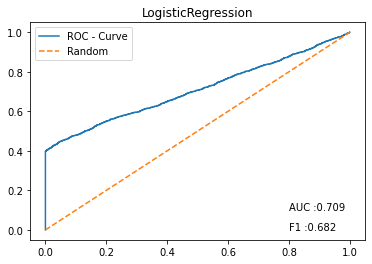

혼동행렬 : , 
 [[1006  769]
 [ 870 1756]]


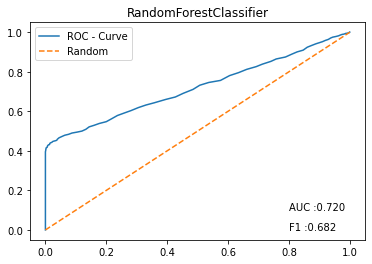

혼동행렬 : , 
 [[1140  635]
 [ 937 1689]]


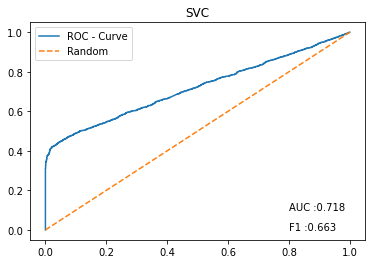

혼동행렬 : , 
 [[1339  436]
 [1107 1519]]


In [ ]:
for model in models:
    get_eval(model, X_train_sc, y_train, X_test_sc, y_test)

## (추가) fitted 성능 평가

In [ ]:
cluster = gm.fit_predict(np.array(X_train['Weight_in_gms']).reshape(-1,1))
X_train['Weight_in_gms'] = cluster.astype(object)

cluster = gm.fit_predict(np.array(X_test['Weight_in_gms']).reshape(-1,1))
X_test['Weight_in_gms'] = cluster.astype(object)

# X_train
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링

X_train_copy = X_train.copy()


cat = [col for col in X_train_copy.columns if X_train_copy[col].dtype=='object']
num = list(set(X_train_copy.columns) - set(cat))

cat_X_train = pd.get_dummies(X_train_copy.loc[:,cat], drop_first=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_X_train = X_train_copy.loc[:,num]
num_X_train_sc = pd.DataFrame(sc.fit_transform(X_train_copy.loc[:,num]), columns=X_train_copy.loc[:,num].columns)


# X_test
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링

cat = [col for col in X_test.columns if X_test[col].dtype=='object']
num = list(set(X_test.columns) - set(cat))

cat_X_test = pd.get_dummies(X_test.loc[:,cat], drop_first=True)
num_X_test = X_test.loc[:,num]
num_X_test_sc = pd.DataFrame(sc.transform(X_test.loc[:,num]), columns=X_test.loc[:,num].columns)



# X_train, X_test before scaling
X_train = pd.concat([cat_X_train, num_X_train],axis=1)
X_test = pd.concat([cat_X_test, num_X_test],axis=1)

# X_train, X_test after scailing
X_train_sc = pd.concat([cat_X_train, num_X_train_sc],axis=1)
X_test_sc = pd.concat([cat_X_test, num_X_test_sc],axis=1)

In [ ]:
X_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Ship,5,2,259,5,low,F,7,1032
1,F,Ship,3,5,133,3,medium,F,4,5902
2,F,Road,3,4,191,5,medium,F,4,4243
3,D,Ship,4,2,221,3,low,M,10,4126
4,D,Flight,4,5,230,2,low,F,38,2890
...,...,...,...,...,...,...,...,...,...,...
4396,F,Flight,4,1,157,3,medium,M,31,1712
4397,B,Road,3,5,139,2,medium,M,7,5536
4398,A,Road,4,1,170,10,medium,F,3,5211
4399,B,Ship,3,1,244,3,medium,F,1,5695


In [ ]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score

for model in models:
    model.fit(X_train, y_train)


for model in models:
    model.fit(X_train_sc, y_train)


for model in models:
    print('{0}의 R2 값 : {1:.3f}'.format(model.__class__.__name__, model.score(X_train_sc, y_train))) # Hold-out, R2
    print('K-Fold (k=5) {0}의 F1 값 : {1:.3f}'.format(model.__class__.__name__, 
        np.mean( # # CV=5, K-Fold 성능평가, Accuracy
        cross_val_score(estimator=model,
                    X = X_train_sc, y = y_train, cv =5,
                    scoring = 'f1'))
    ))

LogisticRegression의 R2 값 : 0.636
K-Fold (k=5) LogisticRegression의 F1 값 : 0.691
RandomForestClassifier의 R2 값 : 1.000
K-Fold (k=5) RandomForestClassifier의 F1 값 : 0.675
SVC의 R2 값 : 0.706
K-Fold (k=5) SVC의 F1 값 : 0.666


## GMM을 활용하여 'Weight_in_gms' 을 소형, 대형으로 범주화 하여 분석
- 효과가 없음...

In [ ]:
# test 데이터 불러오기 
X_train = pd.read_csv('./5.shipping/X_train.csv')
X_train = X_train.drop('ID', axis=1)

X_test = pd.read_csv('./5.shipping/X_test.csv')
X_test = X_test.drop('ID', axis=1)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, warm_start=True, random_state=0) 
# 이전 피팅 정보를 재사용하여 후속 계산의 수렴 속도를 빠르게 해줌

In [ ]:
X_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,A,Flight,4,3,266,5,high,F,5,1590
1,F,Ship,3,1,174,2,low,M,44,1556
2,F,Road,4,1,154,10,high,M,10,5674
3,F,Ship,4,3,158,3,medium,F,27,1207
4,A,Flight,5,3,175,3,low,M,7,4833
...,...,...,...,...,...,...,...,...,...,...
6593,F,Road,5,2,221,6,medium,M,4,1952
6594,F,Ship,4,5,256,3,medium,M,10,4504
6595,F,Ship,3,1,217,4,medium,F,1,5761
6596,F,Road,4,5,174,3,medium,F,8,5576


In [ ]:
cluster = gm.fit_predict(np.array(X_train['Weight_in_gms']).reshape(-1,1))
X_train['Weight_in_gms'] = cluster.astype(object)

cluster = gm.fit_predict(np.array(X_test['Weight_in_gms']).reshape(-1,1))
X_test['Weight_in_gms'] = cluster.astype(object)

# X_train
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링

X_train_copy = X_train.copy()


cat = [col for col in X_train_copy.columns if X_train_copy[col].dtype=='object']
num = list(set(X_train_copy.columns) - set(cat))

cat_X_train = pd.get_dummies(X_train_copy.loc[:,cat], drop_first=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_X_train = X_train_copy.loc[:,num]
num_X_train_sc = pd.DataFrame(sc.fit_transform(X_train_copy.loc[:,num]), columns=X_train_copy.loc[:,num].columns)


# X_test
# 범주형 변수 원핫 인코딩
# 수치형 변수 스케일링

cat = [col for col in X_test.columns if X_test[col].dtype=='object']
num = list(set(X_test.columns) - set(cat))

cat_X_test = pd.get_dummies(X_test.loc[:,cat], drop_first=True)
num_X_test = X_test.loc[:,num]
num_X_test_sc = pd.DataFrame(sc.transform(X_test.loc[:,num]), columns=X_test.loc[:,num].columns)



# X_train, X_test before scaling
X_train = pd.concat([cat_X_train, num_X_train],axis=1)
X_test = pd.concat([cat_X_test, num_X_test],axis=1)

# X_train, X_test after scailing
X_train_sc = pd.concat([cat_X_train, num_X_train_sc],axis=1)
X_test_sc = pd.concat([cat_X_test, num_X_test_sc],axis=1)

In [ ]:
X_train

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_low,Product_importance_medium,Gender_M,Weight_in_gms_1,Discount_offered,Customer_rating,Prior_purchases,Cost_of_the_Product
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5,3,5,266
1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,44,1,2,174
2,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,10,1,10,154
3,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,27,3,3,158
4,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,7,3,3,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,4,2,6,221
6594,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,10,5,3,256
6595,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,4,217
6596,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,8,5,3,174
